In [8]:
import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report

path_pattern = './output/persistence/{}'
X_train = pickle.load(gzip.open(path_pattern.format('X_train.gz'), 'r'))
X_test = pickle.load(gzip.open(path_pattern.format('X_test.gz'), 'r'))
y_train = pickle.load(gzip.open(path_pattern.format('y_train.gz'), 'r'))
y_test = pickle.load(gzip.open(path_pattern.format('y_test.gz'), 'r'))

Training Data:
 Counter({0: 3518, 1: 1630})
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55       881
           1       0.24      0.35      0.29       406

    accuracy                           0.45      1287
   macro avg       0.43      0.42      0.42      1287
weighted avg       0.50      0.45      0.47      1287



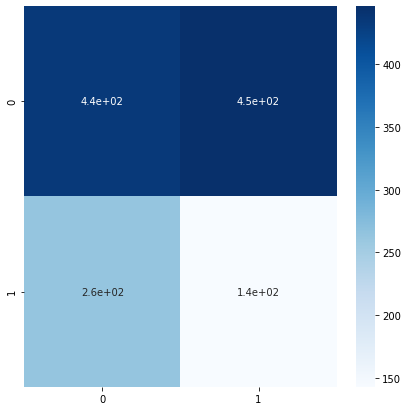

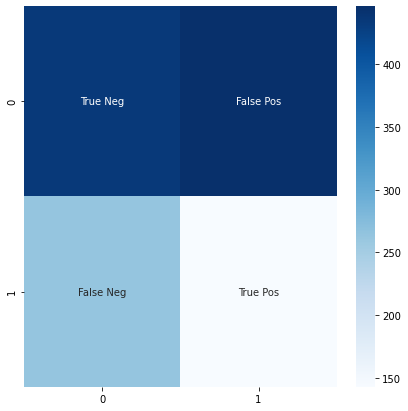

In [9]:
# Train the baseline model (Linear SVM)
print('Training Data:\n', Counter(y_train))

clf = OneClassSVM(kernel='linear', gamma='auto', nu=0.7).fit(X_train, y_train)

# Evaluate the model, and visualise in confusion matrix
y_pred = clf.predict(X_test)
y_pred = np.array([(0 if p < 0 else p) for p in y_pred])

cm = confusion_matrix(y_test, y_pred)
print('Classification Report:\n', classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()
